# Pandas

## 郭耀仁

## Documentation

https://pandas.pydata.org/pandas-docs/stable/index.html

## 啟發自 R 語言

> Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more.

Source: <https://github.com/pandas-dev/pandas>

## Pandas 提供的資料結構

|名稱|描述|
|---|----|
|Series|可以建立索引的一維陣列|
|DataFrame|有列索引與欄標籤的二維資料集|
|Panel|有資料集索引、列索引與欄標籤的三維資料集|

# Series

## 建立 Series

- 用 `Series()` 建立 Series
- 其中 data 可以是：
    - 一個 ndarray
    - 一個 dict
    - 單一資料

```python
import pandas as pd

ser = pd.Series(data, index = idx)
```

## 建立 Series（2）

- data 是一個 ndarray

In [1]:
import numpy as np
import pandas as pd

arr = np.array(("Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"))
ser = pd.Series(arr) # 預設的索引
print(type(ser))
print("\n")
print(ser)

<class 'pandas.core.series.Series'>


0      Monkey D. Luffy
1         Roronoa Zoro
2                 Nami
3                Usopp
4       Vinsmoke Sanji
5    Tony Tony Chopper
6           Nico Robin
7               Franky
8                Brook
dtype: object


In [2]:
# 使用自訂的索引

crew_idx = []
for i in range(9):
    crew_idx.append("crew " + str(i + 1))
ser = pd.Series(arr, index = crew_idx)
print(ser)

crew 1      Monkey D. Luffy
crew 2         Roronoa Zoro
crew 3                 Nami
crew 4                Usopp
crew 5       Vinsmoke Sanji
crew 6    Tony Tony Chopper
crew 7           Nico Robin
crew 8               Franky
crew 9                Brook
dtype: object


## 建立 Series（3）

- data 是一個 dict
- 預設會將 key 當作索引值

In [3]:
import pandas as pd

crew_dict = {
    "captain": "Monkey D. Luffy",
    "swordsman": "Roronoa Zoro",
    "navigator": "Nami",
    "sniper": "Usopp",
    "chef": "Vinsmoke Sanji",
    "doctor": "Tony Tony Chopper",
    "archaeologist": "Nico Robin",
    "shipwright": "Franky",
    "musician": "Brook"
}

ser = pd.Series(crew_dict) # 會依照 key 排序
print(ser)

archaeologist           Nico Robin
captain            Monkey D. Luffy
chef                Vinsmoke Sanji
doctor           Tony Tony Chopper
musician                     Brook
navigator                     Nami
shipwright                  Franky
sniper                       Usopp
swordsman             Roronoa Zoro
dtype: object


In [4]:
import pandas as pd

crew_dict = {
    "captain": "Monkey D. Luffy",
    "swordsman": "Roronoa Zoro",
    "navigator": "Nami",
    "sniper": "Usopp",
    "chef": "Vinsmoke Sanji",
    "doctor": "Tony Tony Chopper",
    "archaeologist": "Nico Robin",
    "shipwright": "Franky",
    "musician": "Brook"
}

ser = pd.Series(crew_dict, index = crew_dict.keys()) # 排序與原 dict 相同
print(ser)

captain            Monkey D. Luffy
swordsman             Roronoa Zoro
navigator                     Nami
sniper                       Usopp
chef                Vinsmoke Sanji
doctor           Tony Tony Chopper
archaeologist           Nico Robin
shipwright                  Franky
musician                     Brook
dtype: object


## 建立 Series（4）

- data 可以是單一資料

In [5]:
import pandas as pd

luffy = "Monkey D. Luffy"
ser = pd.Series(luffy, index = range(5))
print(ser)

0    Monkey D. Luffy
1    Monkey D. Luffy
2    Monkey D. Luffy
3    Monkey D. Luffy
4    Monkey D. Luffy
dtype: object


## Series 的操作

- 透過索引值或標籤選取資料
- 跟 ndarray 沒有差太多

In [6]:
import pandas as pd

crew_dict = {
    "captain": "Monkey D. Luffy",
    "swordsman": "Roronoa Zoro",
    "navigator": "Nami",
    "sniper": "Usopp",
    "chef": "Vinsmoke Sanji",
    "doctor": "Tony Tony Chopper",
    "archaeologist": "Nico Robin",
    "shipwright": "Franky",
    "musician": "Brook"
}

ser = pd.Series(crew_dict, index = crew_dict.keys()) # 排序與原 dict 相同
print(ser[0])
print(ser['captain'])
print("\n")
print(ser[[0, 3, 6]])
print(ser[['captain', 'sniper', 'archaeologist']])

Monkey D. Luffy
Monkey D. Luffy


captain          Monkey D. Luffy
sniper                     Usopp
archaeologist         Nico Robin
dtype: object
captain          Monkey D. Luffy
sniper                     Usopp
archaeologist         Nico Robin
dtype: object


## Series 的操作（2）

- 透過 `:` 快速地切割

In [7]:
import pandas as pd

crew_dict = {
    "captain": "Monkey D. Luffy",
    "swordsman": "Roronoa Zoro",
    "navigator": "Nami",
    "sniper": "Usopp",
    "chef": "Vinsmoke Sanji",
    "doctor": "Tony Tony Chopper",
    "archaeologist": "Nico Robin",
    "shipwright": "Franky",
    "musician": "Brook"
}

ser = pd.Series(crew_dict, index = crew_dict.keys()) # 排序與原 dict 相同
print(ser[:3])
print("\n")
print(ser['sniper':])

captain      Monkey D. Luffy
swordsman       Roronoa Zoro
navigator               Nami
dtype: object


sniper                       Usopp
chef                Vinsmoke Sanji
doctor           Tony Tony Chopper
archaeologist           Nico Robin
shipwright                  Franky
musician                     Brook
dtype: object


## Series 的操作（3）

- 也可以透過判斷條件進行布林篩選

In [8]:
import pandas as pd

crew_dict = {
    "captain": "Monkey D. Luffy",
    "swordsman": "Roronoa Zoro",
    "navigator": "Nami",
    "sniper": "Usopp",
    "chef": "Vinsmoke Sanji",
    "doctor": "Tony Tony Chopper",
    "archaeologist": "Nico Robin",
    "shipwright": "Franky",
    "musician": "Brook"
}

ser = pd.Series(crew_dict, index = crew_dict.keys()) # 排序與原 dict 相同
name_filter = ser.isin(("Nami", "Nico Robin"))
print(ser[name_filter])

navigator              Nami
archaeologist    Nico Robin
dtype: object


## Series 的操作（4）

- NumPy 的函數也都適用

In [9]:
import pandas as pd

crew_age = {
    "Monkey D. Luffy": 19,
    "Roronoa Zoro": 21,
    "Nami": 20,
    "Usopp": 19,
    "Vinsmoke Sanji": 21,
    "Tony Tony Chopper": 17,
    "Nico Robin": 30,
    "Franky": 36,
    "Brook": 90
}

ser = pd.Series(crew_age)
print("草帽海賊團的平均年齡：%.2f" % np.mean(ser))
print("草帽海賊團的年齡標準差：%.2f" % np.std(ser))

草帽海賊團的平均年齡：30.33
草帽海賊團的年齡標準差：21.88


## Series 的操作（5）

- 同樣適用 element-wise 運算

In [10]:
import pandas as pd

crew_age = {
    "Monkey D. Luffy": 19,
    "Roronoa Zoro": 21,
    "Nami": 20,
    "Usopp": 19,
    "Vinsmoke Sanji": 21,
    "Tony Tony Chopper": 17,
    "Nico Robin": 30,
    "Franky": 36,
    "Brook": 90
}

ser = pd.Series(crew_age, index = crew_age.keys())
print(ser - 2)

Monkey D. Luffy      17
Roronoa Zoro         19
Nami                 18
Usopp                17
Vinsmoke Sanji       19
Tony Tony Chopper    15
Nico Robin           28
Franky               34
Brook                88
dtype: int64


# DataFrame

## 建立 DataFrame

- 用 `DataFrame()` 建立 DataFrame
- 其中 data 是：
    - 一個 dict
    - 一個 ndarray

```python
import pandas as pd

df = pd.DataFrame(data)
```

## 建立 DataFrame（2）

- 其中 data 是一個 dict

In [11]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict) # 欄標籤預設排序
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,age,is_male,name
0,19,True,Monkey D. Luffy
1,21,True,Roronoa Zoro
2,20,False,Nami
3,19,True,Usopp
4,21,True,Vinsmoke Sanji
5,17,True,Tony Tony Chopper
6,30,False,Nico Robin
7,36,True,Franky
8,90,True,Brook


In [12]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,age,is_male
0,Monkey D. Luffy,19,True
1,Roronoa Zoro,21,True
2,Nami,20,False
3,Usopp,19,True
4,Vinsmoke Sanji,21,True
5,Tony Tony Chopper,17,True
6,Nico Robin,30,False
7,Franky,36,True
8,Brook,90,True


## 建立 DataFrame（3）

- 其中 data 是一個 ndarray

In [13]:
import numpy as np
import pandas as pd

arr = np.array([
    ["Monkey D. Luffy", 19, True],
    ["Roronoa Zoro", 21, True],
    ["Nami", 20, False],
    ["Usopp", 19, True],
    ["Vinsmoke Sanji", 21, True],
    ["Tony Tony Chopper", 17, True],
    ["Nico Robin", 30, False],
    ["Franky", 36, True],
    ["Brook", 90, True]
])
df = pd.DataFrame(arr, columns = ["name", "age", "is_male"])
df

,name,age,is_male
0,Monkey D. Luffy,19,True
1,Roronoa Zoro,21,True
2,Nami,20,False
3,Usopp,19,True
4,Vinsmoke Sanji,21,True
5,Tony Tony Chopper,17,True
6,Nico Robin,30,False
7,Franky,36,True
8,Brook,90,True


In [14]:
import numpy as np
import pandas as pd

arr = np.array([
    ["Monkey D. Luffy", 19, True],
    ["Roronoa Zoro", 21, True],
    ["Nami", 20, False],
    ["Usopp", 19, True],
    ["Vinsmoke Sanji", 21, True],
    ["Tony Tony Chopper", 17, True],
    ["Nico Robin", 30, False],
    ["Franky", 36, True],
    ["Brook", 90, True]
])
df = pd.DataFrame(arr, columns = ["name", "age", "is_male"])
print(df.dtypes)
df['age'] = df['age'].astype(int)
df['is_male'] = df['is_male'].astype(bool)
print("\n")
print(df.dtypes)

name       object
age        object
is_male    object
dtype: object


name       object
age         int64
is_male      bool
dtype: object


## Data frame 的操作

- 包含多種變數類型，不像 ndarray 僅容納單一變數類型

In [15]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
df.dtypes

name       object
age         int64
is_male      bool
dtype: object

## Data frame 的操作（2）

- 可以直接指派新增一個變數

In [16]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
df['age_2_yr_ago'] = df['age'] - 2
df

,name,age,is_male,age_2_yr_ago
0,Monkey D. Luffy,19,True,17
1,Roronoa Zoro,21,True,19
2,Nami,20,False,18
3,Usopp,19,True,17
4,Vinsmoke Sanji,21,True,19
5,Tony Tony Chopper,17,True,15
6,Nico Robin,30,False,28
7,Franky,36,True,34
8,Brook,90,True,88


In [17]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
df['favorite_food'] = ["Meat", "Food matches wine", "Orange", "Fish", "Food matches black tea", "Sweets", "Food matches coffee", "Food matches coke", "Milk"]
df

,name,age,is_male,favorite_food
0,Monkey D. Luffy,19,True,Meat
1,Roronoa Zoro,21,True,Food matches wine
2,Nami,20,False,Orange
3,Usopp,19,True,Fish
4,Vinsmoke Sanji,21,True,Food matches black tea
5,Tony Tony Chopper,17,True,Sweets
6,Nico Robin,30,False,Food matches coffee
7,Franky,36,True,Food matches coke
8,Brook,90,True,Milk


## Data frame 的操作（3）

- 利用 `.insert()` 指定變數新增的位置

In [18]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
df.insert(1, 'favorite_food', ["Meat", "Food matches wine", "Orange", "Fish", "Food matches black tea", "Sweets", "Food matches coffee", "Food matches coke", "Milk"])
df

,name,favorite_food,age,is_male
0,Monkey D. Luffy,Meat,19,True
1,Roronoa Zoro,Food matches wine,21,True
2,Nami,Orange,20,False
3,Usopp,Fish,19,True
4,Vinsmoke Sanji,Food matches black tea,21,True
5,Tony Tony Chopper,Sweets,17,True
6,Nico Robin,Food matches coffee,30,False
7,Franky,Food matches coke,36,True
8,Brook,Milk,90,True


## Data frame 的操作（4）

- 利用 `del` 刪除變數

In [19]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
del df['is_male']
df

,name,age
0,Monkey D. Luffy,19
1,Roronoa Zoro,21
2,Nami,20
3,Usopp,19
4,Vinsmoke Sanji,21
5,Tony Tony Chopper,17
6,Nico Robin,30
7,Franky,36
8,Brook,90


## Data frame 的操作（5）

- 利用 `.pop()` 將變數刪除後指派給一個 Series

In [20]:
import pandas as pd

straw_hat_dict = {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
                  "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
                  "is_male": [True, True, False, True, True, True, False, True, True]
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"]) # 指定欄標籤排序
ser = df.pop('is_male')
print(type(ser))
print(ser)

<class 'pandas.core.series.Series'>
0     True
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8     True
Name: is_male, dtype: bool


# Panel

## 建立 Panel

- 相對比 Series、DataFrame 冷門
- 有三個維度：
    - items（資料框索引）
    - major_axis（資料框的列索引）
    - minor_axis（資料框的欄索引）

## 建立 Panel（2）

- 建立一個有兩個 DataFrame 的 Panel

In [21]:
import pandas as pd

df_2_yr_ago = pd.DataFrame(
    {
        "name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
        "age": [17, 19, 18, 17, 19, 15, 28, 34, 88],
        "mastered_haki": [False, False, False, False, False, False, False, False, False]
    }
)
df_now = pd.DataFrame(
    {
        "name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
        "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
        "mastered_haki": [True, True, False, True, True, False, False, False, False]
    }
)
panel_data = pd.Panel({
    '2 years ago': df_2_yr_ago,
    'now': df_now
})

In [22]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 9 (major_axis) x 3 (minor_axis)
Items axis: 2 years ago to now
Major_axis axis: 0 to 8
Minor_axis axis: age to name

In [23]:
panel_data['now']

,age,mastered_haki,name
0,19,True,Monkey D. Luffy
1,21,True,Roronoa Zoro
2,20,False,Nami
3,19,True,Usopp
4,21,True,Vinsmoke Sanji
5,17,False,Tony Tony Chopper
6,30,False,Nico Robin
7,36,False,Franky
8,90,False,Brook


In [24]:
panel_data['2 years ago']

,age,mastered_haki,name
0,17,False,Monkey D. Luffy
1,19,False,Roronoa Zoro
2,18,False,Nami
3,17,False,Usopp
4,19,False,Vinsmoke Sanji
5,15,False,Tony Tony Chopper
6,28,False,Nico Robin
7,34,False,Franky
8,88,False,Brook


## 選擇 Data frame 中的元素

- 可以透過中括號 `[]` 選擇元素
- 也可以透過 `.` 將變數當作屬性選擇

In [25]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }
)

print(df['name'])
print("\n")
print(df.name)

0      Monkey D. Luffy
1         Roronoa Zoro
2                 Nami
3                Usopp
4       Vinsmoke Sanji
5    Tony Tony Chopper
6           Nico Robin
7               Franky
8                Brook
Name: name, dtype: object


0      Monkey D. Luffy
1         Roronoa Zoro
2                 Nami
3                Usopp
4       Vinsmoke Sanji
5    Tony Tony Chopper
6           Nico Robin
7               Franky
8                Brook
Name: name, dtype: object


## 選擇 Data frame 中的元素（2）

- 可以選擇多個變數

In [26]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }
)
print(df[['name', 'is_male']])

                name  is_male
0    Monkey D. Luffy     True
1       Roronoa Zoro     True
2               Nami    False
3              Usopp     True
4     Vinsmoke Sanji     True
5  Tony Tony Chopper     True
6         Nico Robin    False
7             Franky     True
8              Brook     True


## 選擇 Data frame 中的元素（3）

- `[:]` 範圍切割（range slicing）支援列資料

In [27]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }
)
df[:5]

,age,is_male,name
0,19,True,Monkey D. Luffy
1,21,True,Roronoa Zoro
2,20,False,Nami
3,19,True,Usopp
4,21,True,Vinsmoke Sanji


In [28]:
df[5:]

,age,is_male,name
5,17,True,Tony Tony Chopper
6,30,False,Nico Robin
7,36,True,Franky
8,90,True,Brook


In [29]:
df[0:7:2]

,age,is_male,name
0,19,True,Monkey D. Luffy
2,20,False,Nami
4,21,True,Vinsmoke Sanji
6,30,False,Nico Robin


## 選擇 Data frame 中的元素（4）

- 不同的選擇方法：
    - `.loc`
    - `.iloc`

In [30]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    },
    index = list(range(5)) + list(range(10, 14))
)

df

,age,is_male,name
0,19,True,Monkey D. Luffy
1,21,True,Roronoa Zoro
2,20,False,Nami
3,19,True,Usopp
4,21,True,Vinsmoke Sanji
10,17,True,Tony Tony Chopper
11,30,False,Nico Robin
12,36,True,Franky
13,90,True,Brook


In [31]:
df.loc[:7, ['age', 'name']]

,age,name
0,19,Monkey D. Luffy
1,21,Roronoa Zoro
2,20,Nami
3,19,Usopp
4,21,Vinsmoke Sanji


In [32]:
df.iloc[:7, [0, 2]]

,age,name
0,19,Monkey D. Luffy
1,21,Roronoa Zoro
2,20,Nami
3,19,Usopp
4,21,Vinsmoke Sanji
10,17,Tony Tony Chopper
11,30,Nico Robin


## 選擇 Data frame 中的元素（5）

- 可以使用布林值篩選

In [33]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }
)
# 篩選小於 30 歲的船員
age_filter = df.age < 30
df[age_filter]

,age,is_male,name
0,19,True,Monkey D. Luffy
1,21,True,Roronoa Zoro
2,20,False,Nami
3,19,True,Usopp
4,21,True,Vinsmoke Sanji
5,17,True,Tony Tony Chopper


## 選擇 Data frame 中的元素（6）

- 請同學練習使用布林值篩選出草帽海賊團的熟男：
    - `age` >= 30
    - `is_male` == True

## 了解 DataFrame 的概觀

- `.shape`
- `.index`
- `.columns`
- `.info()`
- `.count()`

In [34]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }
)
print(df.shape)
print("\n")
print(df.index)
print("\n")
print(df.columns)
print("\n")
print(df.info())
print("\n")
print(df.count())

(9, 3)


RangeIndex(start=0, stop=9, step=1)


Index(['age', 'is_male', 'name'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
age        9 non-null int64
is_male    9 non-null bool
name       9 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 233.0+ bytes
None


age        9
is_male    9
name       9
dtype: int64


## 了解 DataFrame 的概觀（2）

- `.head()`
- `.tail()`
- `.describe()`

In [35]:
print(df.head(3))
print("\n")
print(df.tail(3))
print("\n")
print(df.describe())

   age  is_male             name
0   19     True  Monkey D. Luffy
1   21     True     Roronoa Zoro
2   20    False             Nami


   age  is_male        name
6   30    False  Nico Robin
7   36     True      Franky
8   90     True       Brook


             age
count   9.000000
mean   30.333333
std    23.205603
min    17.000000
25%    19.000000
50%    21.000000
75%    30.000000
max    90.000000


## 排序 DataFrame

- `.sort_index()`
- `.sort_values()`

In [36]:
import pandas as pd # 引用套件並縮寫為 pd

df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }, columns = ['name', 'age', 'is_male']
)

df.sort_index(axis = 0, ascending = False)

,name,age,is_male
8,Brook,90,True
7,Franky,36,True
6,Nico Robin,30,False
5,Tony Tony Chopper,17,True
4,Vinsmoke Sanji,21,True
3,Usopp,19,True
2,Nami,20,False
1,Roronoa Zoro,21,True
0,Monkey D. Luffy,19,True


In [37]:
df.sort_index(axis = 1, ascending = False)

,name,is_male,age
0,Monkey D. Luffy,True,19
1,Roronoa Zoro,True,21
2,Nami,False,20
3,Usopp,True,19
4,Vinsmoke Sanji,True,21
5,Tony Tony Chopper,True,17
6,Nico Robin,False,30
7,Franky,True,36
8,Brook,True,90


In [38]:
df.sort_values(by = 'age')

,name,age,is_male
5,Tony Tony Chopper,17,True
0,Monkey D. Luffy,19,True
3,Usopp,19,True
2,Nami,20,False
1,Roronoa Zoro,21,True
4,Vinsmoke Sanji,21,True
6,Nico Robin,30,False
7,Franky,36,True
8,Brook,90,True


In [39]:
df.sort_values(by = ['is_male', 'age'])

,name,age,is_male
2,Nami,20,False
6,Nico Robin,30,False
5,Tony Tony Chopper,17,True
0,Monkey D. Luffy,19,True
3,Usopp,19,True
1,Roronoa Zoro,21,True
4,Vinsmoke Sanji,21,True
7,Franky,36,True
8,Brook,90,True


## 處理遺漏值

- `.dropna()`
- `.fillna()`

In [40]:
import pandas as pd
import numpy as np

name = ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook", np.NaN]
age = [19, 21, 20, 19, 21, 17, 30, 36, np.NaN, np.NaN]
is_male = [True, True, False, True, True, np.NaN, False, True, True, np.NaN]

straw_hat_dict = {"name": name,
                  "age": age,
                  "is_male": is_male
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"])
df

,name,age,is_male
0,Monkey D. Luffy,19.0,True
1,Roronoa Zoro,21.0,True
2,Nami,20.0,False
3,Usopp,19.0,True
4,Vinsmoke Sanji,21.0,True
5,Tony Tony Chopper,17.0,NaN
6,Nico Robin,30.0,False
7,Franky,36.0,True
8,Brook,NaN,True
9,NaN,NaN,NaN


In [41]:
df.dropna(how = 'all')

,name,age,is_male
0,Monkey D. Luffy,19.0,True
1,Roronoa Zoro,21.0,True
2,Nami,20.0,False
3,Usopp,19.0,True
4,Vinsmoke Sanji,21.0,True
5,Tony Tony Chopper,17.0,NaN
6,Nico Robin,30.0,False
7,Franky,36.0,True
8,Brook,NaN,True


In [42]:
df.dropna(how = 'any')

,name,age,is_male
0,Monkey D. Luffy,19.0,True
1,Roronoa Zoro,21.0,True
2,Nami,20.0,False
3,Usopp,19.0,True
4,Vinsmoke Sanji,21.0,True
6,Nico Robin,30.0,False
7,Franky,36.0,True


## 處理遺漏值（2）

In [43]:
import pandas as pd
import numpy as np

name = ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook", np.NaN]
age = [19, 21, 20, 19, 21, 17, 30, 36, np.NaN, np.NaN]
is_male = [True, True, False, True, True, np.NaN, False, True, True, np.NaN]

straw_hat_dict = {"name": name,
                  "age": age,
                  "is_male": is_male
}

df = pd.DataFrame(straw_hat_dict, columns = ["name", "age", "is_male"])
df = df.dropna(how = "all")

In [44]:
df['is_male'] = df['is_male'].fillna(True)
df['age'] = df['age'].fillna(90)
df

,name,age,is_male
0,Monkey D. Luffy,19.0,True
1,Roronoa Zoro,21.0,True
2,Nami,20.0,False
3,Usopp,19.0,True
4,Vinsmoke Sanji,21.0,True
5,Tony Tony Chopper,17.0,True
6,Nico Robin,30.0,False
7,Franky,36.0,True
8,Brook,90.0,True


## 合併

- `pandas.concat()`
- 垂直合併

In [45]:
df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }, columns = ['name', 'age', 'is_male']
)

upper_df = df.loc[:5, :]
lower_df = df.loc[5:, :]
pd.concat([upper_df, lower_df], axis = 0)

,name,age,is_male
0,Monkey D. Luffy,19,True
1,Roronoa Zoro,21,True
2,Nami,20,False
3,Usopp,19,True
4,Vinsmoke Sanji,21,True
5,Tony Tony Chopper,17,True
5,Tony Tony Chopper,17,True
6,Nico Robin,30,False
7,Franky,36,True
8,Brook,90,True


## 合併（2）

- `pandas.concat()`
- 水平合併

In [46]:
df = pd.DataFrame(
    {"name": ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"],
     "age": [19, 21, 20, 19, 21, 17, 30, 36, 90],
     "is_male": [True, True, False, True, True, True, False, True, True]
    }, columns = ['name', 'age', 'is_male']
)

left_df = df.loc[:, "name":"age"]
right_df = df.loc[:, "is_male"]
pd.concat([left_df, right_df], axis = 1)

,name,age,is_male
0,Monkey D. Luffy,19,True
1,Roronoa Zoro,21,True
2,Nami,20,False
3,Usopp,19,True
4,Vinsmoke Sanji,21,True
5,Tony Tony Chopper,17,True
6,Nico Robin,30,False
7,Franky,36,True
8,Brook,90,True


## 合併（3）

- `pd.merge()`
- Inner Join

In [47]:
import pandas as pd

name = ["Monkey D. Luffy", "Roronoa Zoro", "Nami", "Usopp", "Vinsmoke Sanji", "Tony Tony Chopper", "Nico Robin", "Franky", "Brook"]
age = [19, 21, 20, 19, 21, 17, 30, 36, 90]
straw_hat_dict = {
    "name": name,
    "age": age
}

name = ["Monkey D. Luffy", "Tony Tony Chopper", "Nico Robin", "Brook", "Trafalgar D. Water Law"]
devil_fruit = ["Gum-Gum Fruit", "Human-Human Fruit", "Hana-Hana Fruit", "Revive-Revive Fruit", "Op-Op Fruit"]
devil_fruit_dict = {
    "name": name,
    "devil_fruit": devil_fruit
}

left_df = pd.DataFrame(straw_hat_dict)
right_df = pd.DataFrame(devil_fruit_dict)
inner_joined = pd.merge(left_df, right_df)
inner_joined

,age,name,devil_fruit
0,19,Monkey D. Luffy,Gum-Gum Fruit
1,17,Tony Tony Chopper,Human-Human Fruit
2,30,Nico Robin,Hana-Hana Fruit
3,90,Brook,Revive-Revive Fruit


## 合併（4）

- `pd.merge()`
- Left Join

In [48]:
left_joined = pd.merge(left_df, right_df, how = "left")
left_joined

,age,name,devil_fruit
0,19,Monkey D. Luffy,Gum-Gum Fruit
1,21,Roronoa Zoro,NaN
2,20,Nami,NaN
3,19,Usopp,NaN
4,21,Vinsmoke Sanji,NaN
5,17,Tony Tony Chopper,Human-Human Fruit
6,30,Nico Robin,Hana-Hana Fruit
7,36,Franky,NaN
8,90,Brook,Revive-Revive Fruit


## 合併（5）

- `pd.merge()`
- Right Join

In [49]:
right_joined = pd.merge(left_df, right_df, how = "right")
right_joined

,age,name,devil_fruit
0,19.0,Monkey D. Luffy,Gum-Gum Fruit
1,17.0,Tony Tony Chopper,Human-Human Fruit
2,30.0,Nico Robin,Hana-Hana Fruit
3,90.0,Brook,Revive-Revive Fruit
4,NaN,Trafalgar D. Water Law,Op-Op Fruit


## 合併（6）

- `pd.merge()`
- Full Join

In [50]:
full_joined = pd.merge(left_df, right_df, how = "outer")
full_joined

,age,name,devil_fruit
0,19.0,Monkey D. Luffy,Gum-Gum Fruit
1,21.0,Roronoa Zoro,NaN
2,20.0,Nami,NaN
3,19.0,Usopp,NaN
4,21.0,Vinsmoke Sanji,NaN
5,17.0,Tony Tony Chopper,Human-Human Fruit
6,30.0,Nico Robin,Hana-Hana Fruit
7,36.0,Franky,NaN
8,90.0,Brook,Revive-Revive Fruit
9,NaN,Trafalgar D. Water Law,Op-Op Fruit


## Pandas 繪圖功能

In [3]:
import pandas as pd
import quandl

df = quandl.get("WIKI/AAPL", start_date="2016-01-01", end_date="2017-10-31")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0


## Pandas 繪圖功能

- `plot.hist(bins = )` 直方圖
- `plot.line()` 線圖
- `plot.scatter(x = , y = )` 散佈圖
- `plot.box()` 盒鬚圖
- `plot.density()` 密度圖

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

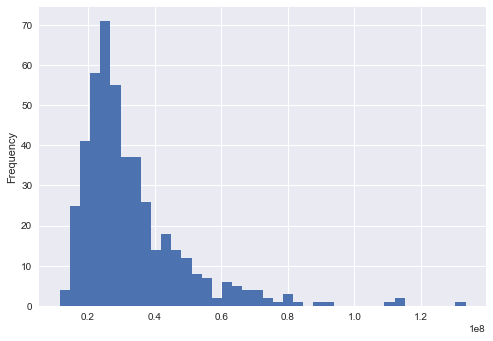

In [11]:
df["Volume"].plot.hist(bins = 40)
plt.show()

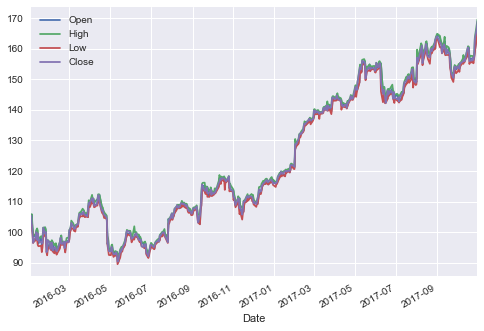

In [15]:
df[["Open", "High", "Low", "Close"]].plot.line()
plt.show()

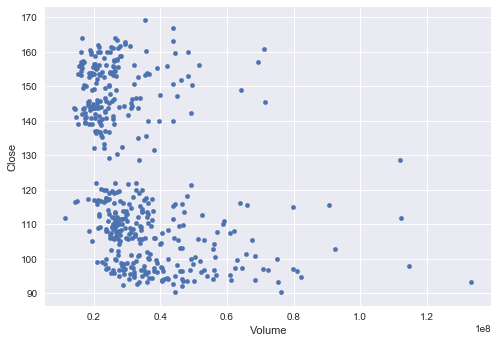

In [26]:
df.plot.scatter(x = "Volume", y = "Close")
plt.show()

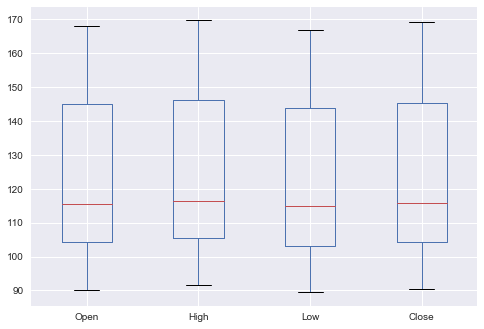

In [28]:
df[["Open", "High", "Low", "Close"]].plot.box()
plt.show()

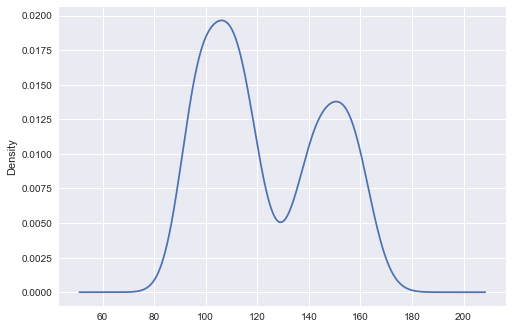

In [33]:
df["Close"].plot.density()
plt.show()